# Chapter 3 of SR2

## Goal
1. Grid based posterior computation
1. Sampling from posterior on the grid
1. Representation of PDF of PMF by a set of samples, sample plot, histogram, kde plot
1. mean, hdi, percentile of posterior distribution (PMF)

# install
1. install current version of anaconda - just click yes till the end.
1. In the left pane, click 'Environment', and create a new env with python version 3.6.
1. Click install `CMD.exe Prompt` in `Anaconda Navigator`, and open it, and execute:

```
$ python -m pip install --upgrade pip
$ pip install --use-feature=2020-resolver pymc3 theano
```
- check the version of theano installed; it should be 1.05. 1.04 caused a lot of errors.

## JupyterLab
If jupyterLab does not open from Anaconda Navigator, open `CMD.exe Prompt', use `pip` to install jupyterlab and run `jupyter-lab` in the command window.

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
import pymc3 as pm

In [3]:
%config InlineBackend.figure_format = 'retina'
%load_ext watermark
#az.style.use('arviz-darkgrid')

## Grid computation

In [4]:
n_success = 6
n_tosses = 9

## 10 grid posteror

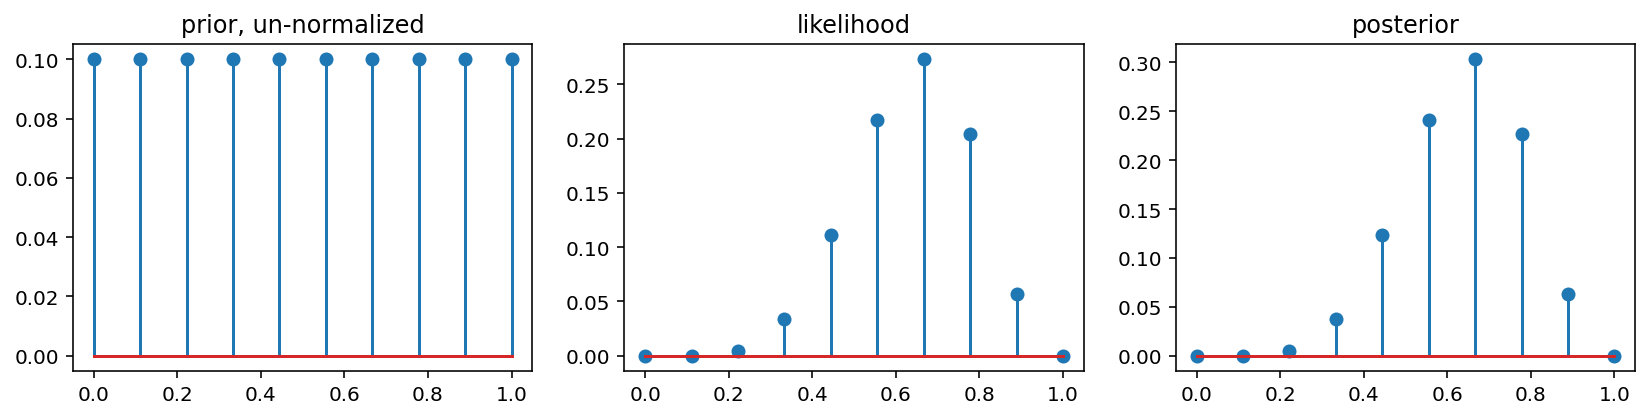

In [5]:
n_grids = 10
p_grid = np.linspace(0, 1, n_grids); p_grid

prior = np.repeat(1./n_grids, n_grids); prior
likeli = stats.binom.pmf(n_success, n_tosses, p_grid);
posterior_un = likeli * prior
posterior = posterior_un / sum(posterior_un)
# print('likeli: ', likeli)

fig, axes = plt.subplots(1,3, figsize=(14,3))
axes[0].stem(p_grid, prior); axes[0].set_title('prior, un-normalized')
axes[1].stem(p_grid, likeli); axes[1].set_title('likelihood');
axes[2].stem(p_grid, posterior); axes[2].set_title('posterior');

## 100 grid posteror

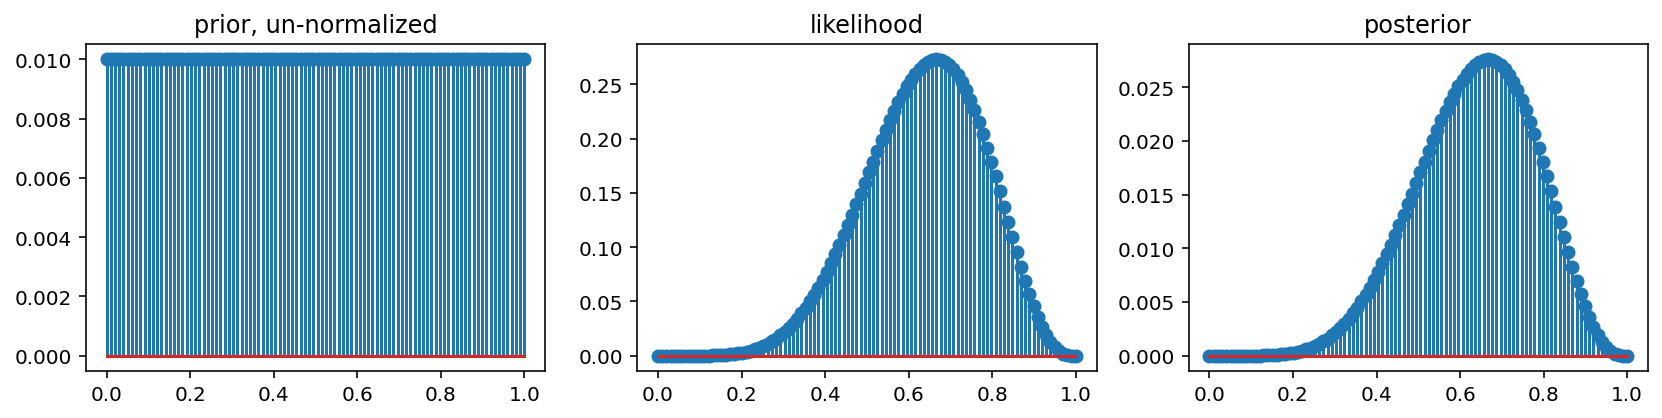

In [6]:
n_grids = 100
p_grid = np.linspace(0, 1, n_grids)

prior = np.repeat(1./n_grids, n_grids); prior
likeli = stats.binom.pmf(n_success, n_tosses, p_grid);
posterior_un = likeli * prior
posterior = posterior_un / sum(posterior_un)
# print('likeli: ', likeli)

fig, axes = plt.subplots(1,3, figsize=(14,3))
axes[0].stem(p_grid, prior); axes[0].set_title('prior, un-normalized')
axes[1].stem(p_grid, likeli); axes[1].set_title('likelihood');
axes[2].stem(p_grid, posterior); axes[2].set_title('posterior');

In [7]:
def posterior_grid (n_grids, n_success=6, n_tosses=9, prior='uniform'):
    p_grid = np.linspace(0, 1, n_grids)

    if type(prior) == str and prior == 'uniform':
        prior = stats.uniform.pdf(p_grid)
    
    likeli = stats.binom.pmf(n_success, n_tosses, p_grid);
    posterior_un = likeli * prior
    posterior = posterior_un / sum(posterior_un)
    # print('likeli: ', likeli)

    fig, axes = plt.subplots(1,3, figsize=(14,3))
    axes[0].plot(p_grid, prior); axes[0].set_title('prior, un-normalized')
    axes[1].plot(p_grid, likeli); axes[1].set_title('likelihood');
    axes[2].plot(p_grid, posterior); axes[2].set_title('posterior');
    
    return p_grid, posterior

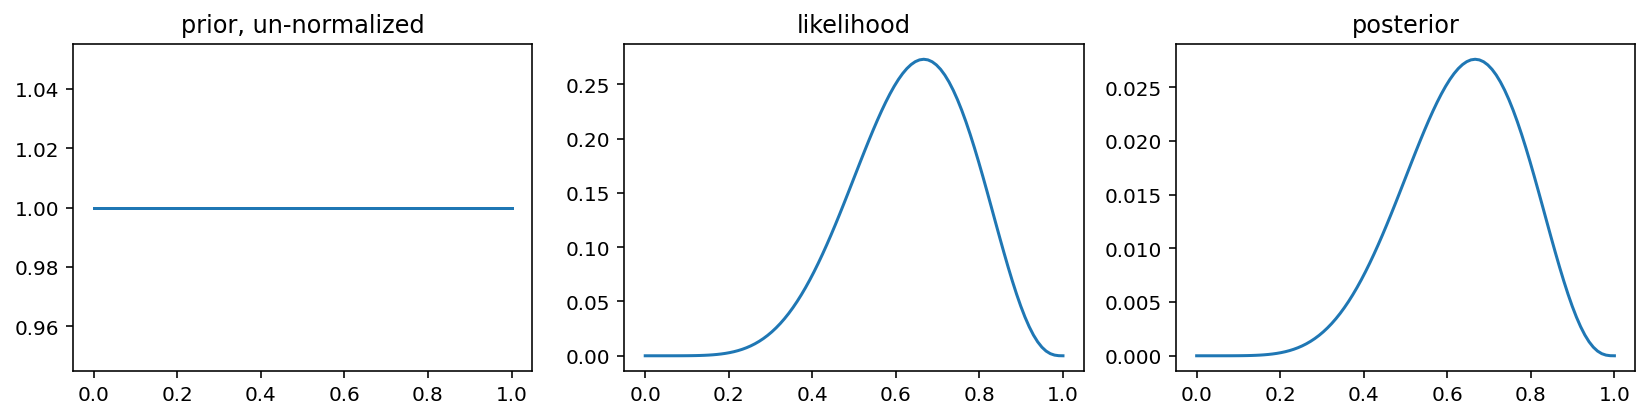

In [8]:
posterior_grid(100, n_success, n_tosses, prior=np.repeat(1, 100));

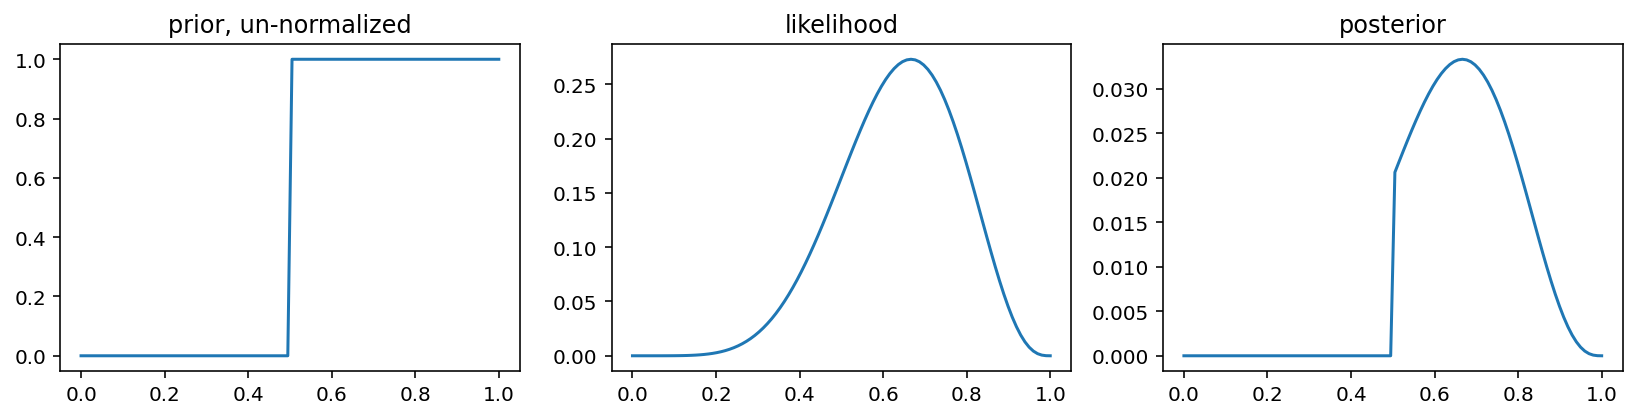

In [9]:
n_grids = 100
p_grid = np.linspace(0, 1, n_grids)
prior = (p_grid >= 0.5).astype(np.float) # truncated
posterior_grid(n_grids, n_success, n_tosses, prior);

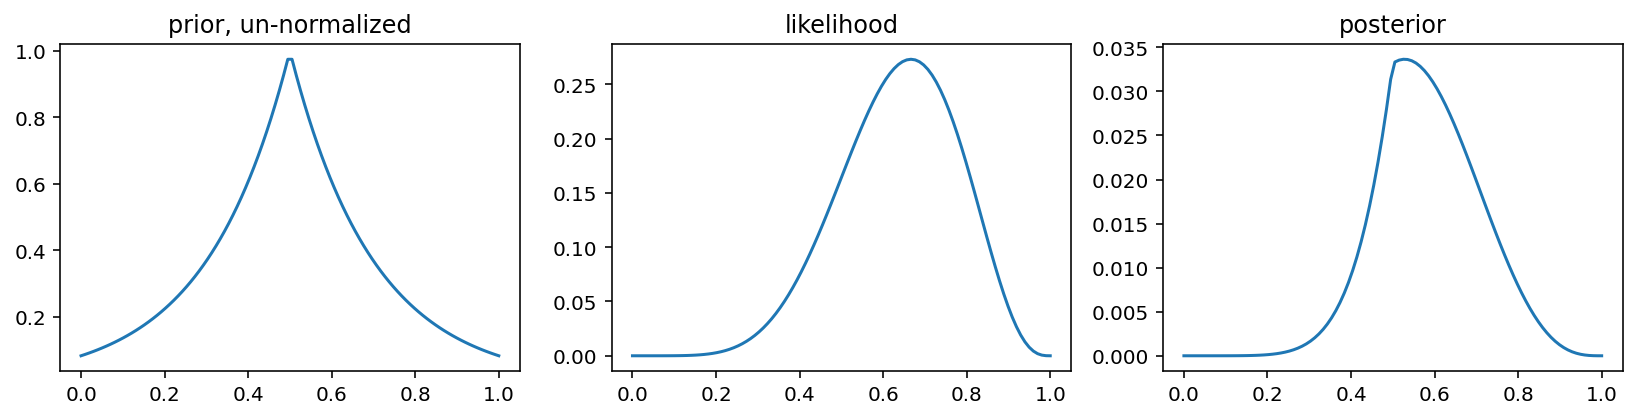

In [10]:
n_grids = 100
p_grid = np.linspace(0, 1, n_grids)
prior = np.exp(-5*abs(p_grid - .5)) # double exp
posterior_grid(n_grids, n_success, n_tosses, prior);

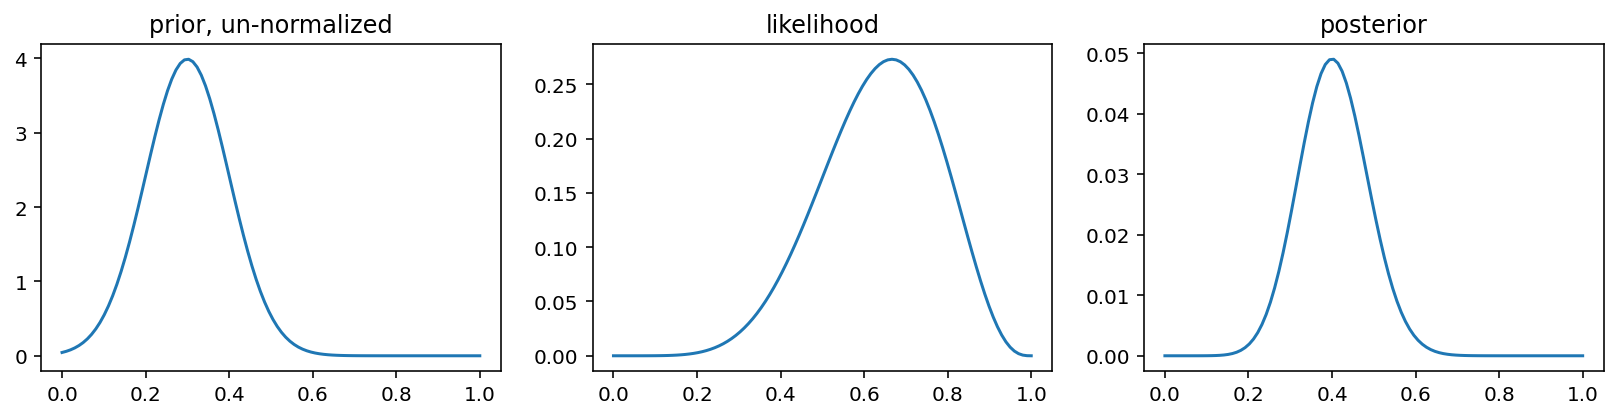

In [11]:
n_grids = 100
p_grid = np.linspace(0, 1, n_grids)
prior = stats.norm.pdf(p_grid, loc=.3, scale=.1)
posterior_grid(n_grids, n_success, n_tosses, prior);

## Now Sampling

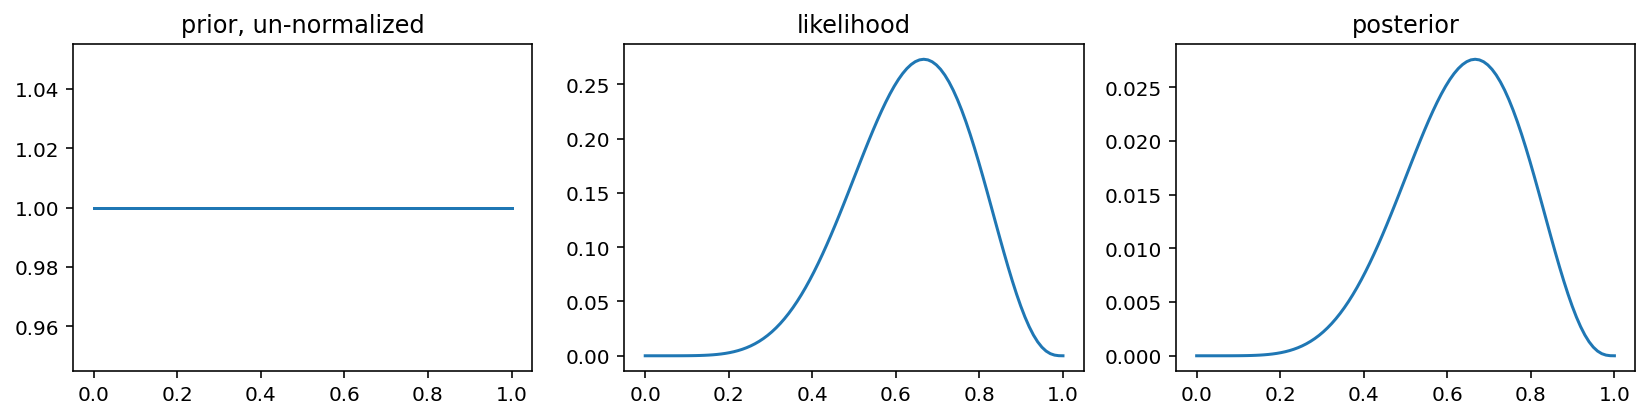

In [12]:
p_grid, posterior = posterior_grid(n_grids, n_success, n_tosses, prior='uniform')

random sample among the values of p_grid array

In [13]:
samples = np.random.choice(p_grid, p=posterior, size=30000, replace=True)

Text(0.5, 1.0, 'sample histogram')

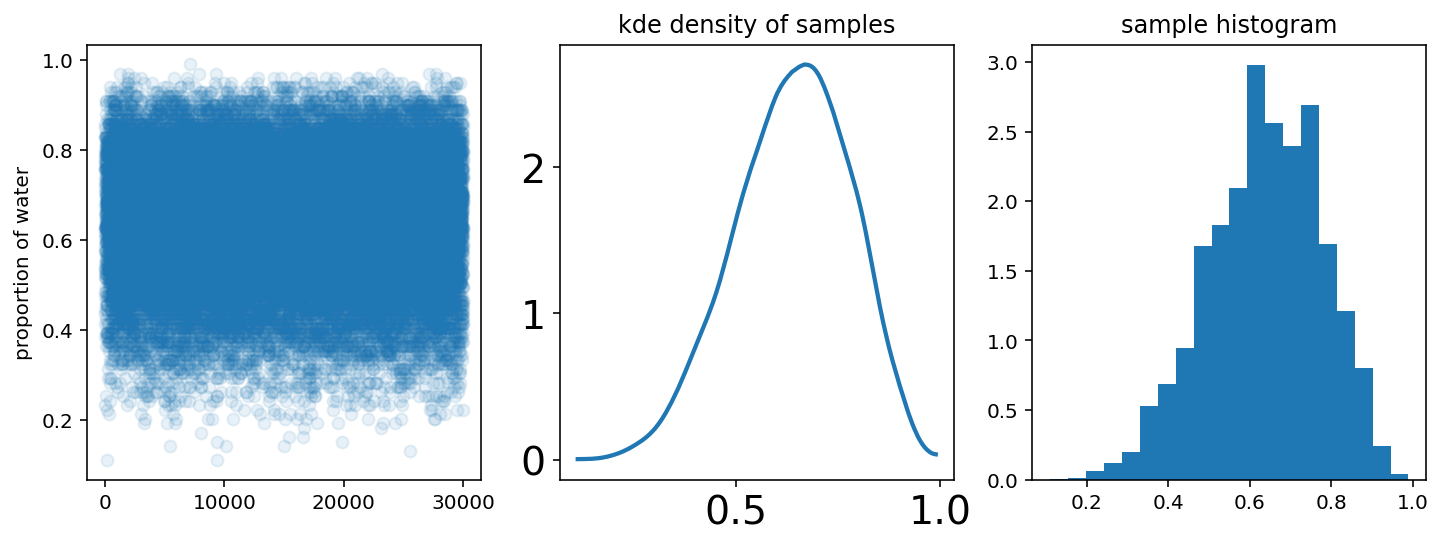

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))
axes[0].plot(samples, 'o', alpha=.1);
axes[0].set_ylabel('proportion of water');
az.plot_kde(samples, ax=axes[1]);
axes[1].set_title('kde density of samples');
axes[2].hist(samples, bins=20, density=True);
axes[2].set_title('sample histogram')

---
A **percentile** (or a centile) is a measure used in statistics indicating the value below which a given percentage of observations in a group of observations falls. For example, the 20th percentile is the value (or score) below which 20% of the observations may be found. See [Wikipedia](https://en.wikipedia.org/wiki/Percentile#:~:text=A%20percentile%20(or%20a%20centile,the%20observations%20may%20be%20found.).

---

In [15]:
np.percentile(samples, [10, 90])

array([0.44444444, 0.81818182])

In [16]:
samples.sort()
n = len(samples)
samples[n//10], samples[n*9//10]

(0.4444444444444445, 0.8181818181818182)

In [17]:
samples[ : len(samples)//10 ].sum() / len(samples)

0.037977441077441075

In [18]:
np.percentile(samples, 50), samples[len(samples)//2]

(0.6464646464646465, 0.6464646464646465)

In [19]:
samples.mean(), np.percentile(samples, 50)

(0.6370929292929294, 0.6464646464646465)

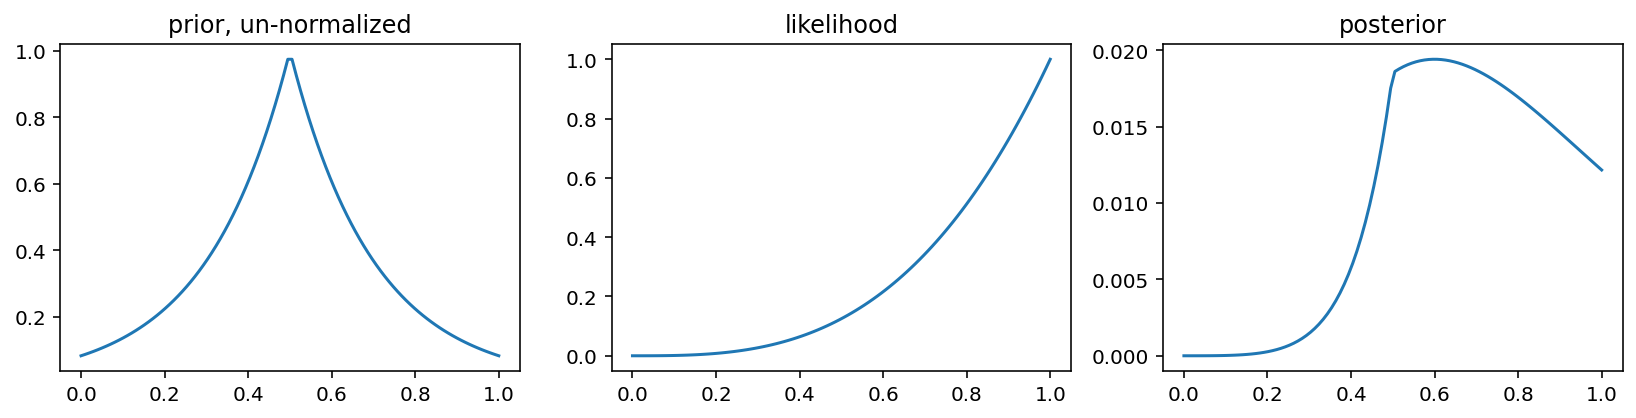

In [20]:
n_grids = 100
p_grid = np.linspace(0, 1, n_grids)
prior = np.exp(-5*abs(p_grid - .5)) # double exp
p_grid, posterior = posterior_grid(n_grids, n_success=3, n_tosses=3, prior=prior)

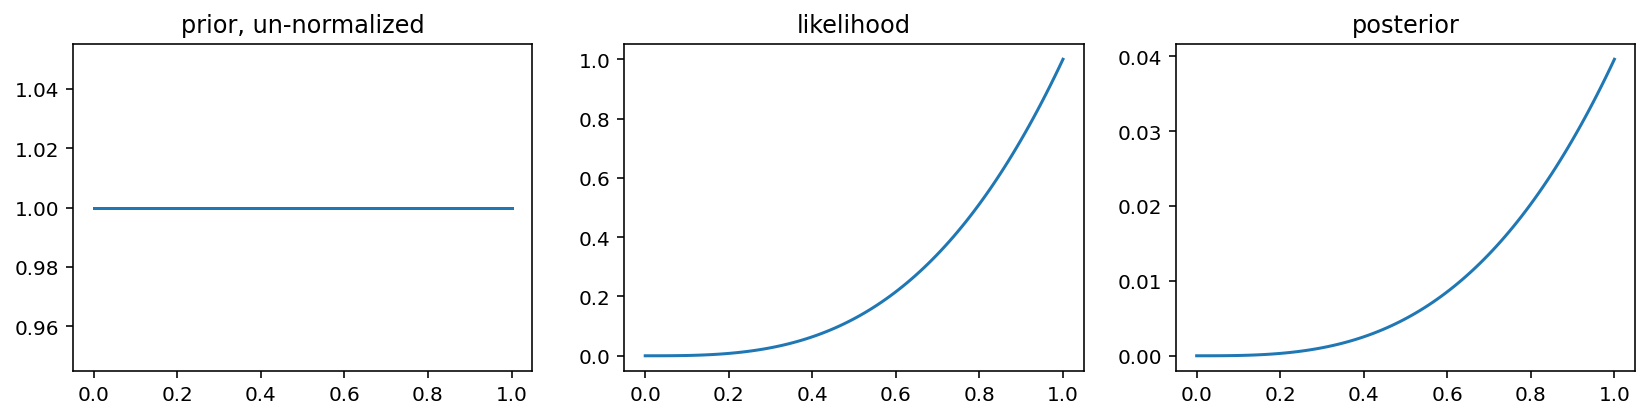

In [21]:
p_grid, posterior = posterior_grid(n_grids=100, n_success=3, n_tosses=3)

In [22]:
samples = np.random.choice(p_grid, p=posterior, size=10000, replace=True)
np.percentile(samples, [10, 25, 50, 75])

array([0.55555556, 0.70707071, 0.83838384, 0.92929293])

In [23]:
hdi = az.hdi(samples, hdi_prob=.5)
hdi

array([0.82828283, 0.98989899])

In [24]:
len(samples[ samples <= 0.84848485 ]) / len(samples)

0.5242

In [25]:
len(samples[ samples < hdi[0] ]) / len(samples)

0.4558

In [26]:
a = len(samples[ samples <= 0.84848485 ]) / len(samples)
b = len(samples[ samples <= 0.84848485 ]) / len(samples)
.5 - a, .5 - b

(-0.0242, -0.0242)

proportions:  [(0.82, 0.4558), (0.822, 0.4558), (0.824, 0.4558), (0.826, 0.4558), (0.828, 0.4558), (0.83, 0.4765), (0.832, 0.4765), (0.834, 0.4765), (0.836, 0.4765), (0.838, 0.4765), (0.84, 0.5007), (0.842, 0.5007), (0.844, 0.5007), (0.846, 0.5007), (0.848, 0.5007), (0.85, 0.5242), (0.852, 0.5242), (0.854, 0.5242), (0.856, 0.5242), (0.858, 0.5242), (0.86, 0.5502)]


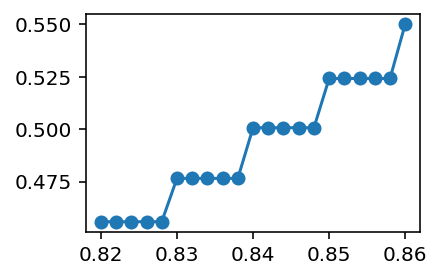

In [27]:
prop = []
x = np.linspace(.82, .86, 21)
for th in x:
    prop.append( len(samples[ samples <= th ]) / len(samples) )
print('proportions: ', list(zip(x, prop)))
plt.figure(figsize=(3,2))
plt.plot(x, prop, '-o');

Posterior Maximum

In [28]:
p_grid[ posterior == max(posterior)]

array([1.])

In [29]:
indx = np.argmax(posterior)
indx, p_grid[indx]

(99, 1.0)

Maximum a posteriori (MAP) estimate is the value along p_grid whose probability is maximal. With samples, it may be taken as the most common value among the sample values.

In [30]:
stats.mode(samples)  # most common value in the samples array

ModeResult(mode=array([1.]), count=array([396]))

Posterior mean and median

In [31]:
mean = samples.mean()
median = np.median(samples)
mean, median

(0.8000515151515152, 0.8383838383838385)

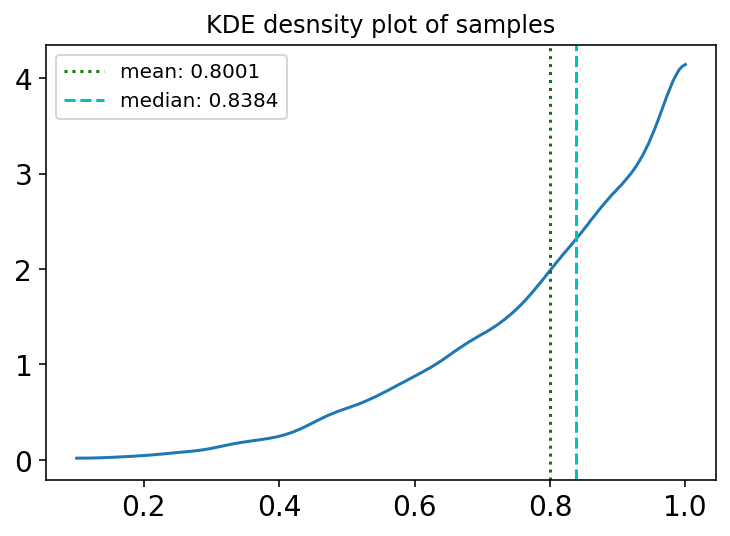

In [32]:
ax = az.plot_kde(samples);
ax.set_title('KDE desnsity plot of samples');
ax.axvline(x=samples.mean(), color='g', label=f'mean: {mean:.4}', linestyle='dotted')
ax.axvline(x=np.median(samples), color='c', label=f'median: {median:.4}', linestyle='dashed')
ax.legend();

#### Code 3.17

**Decision loss**

- If we had to choose only one value $p^*$ among the values on p_grid, then we have a loss.
- mean absolute loss
$$
    L = \mathbb{E}[ | p - p^* | ] \quad \mbox{where } p \in \mbox{p_grid} \\
    = \sum_{i=1}^{\mbox{n_grid}} Pr(p_i) \; | p_i - p^* | \quad \mbox{from definition} \\
    = \frac{1}{\mbox{n_samples}}\sum_{i=1}^\mbox{n_samples}  | p_i - p^* | \quad \mbox{sample mean}
$$
- mean squared loss
$$
    L = \mathbb{E}[ | p - p^* |^2 ] \quad \mbox{where } p \in \mbox{p_grid}
$$

In [33]:
p_star = 0.5  # this is your one choice
mean_abs_loss = sum(posterior * np.abs(p_star - p_grid))
mean_abs_loss

0.31626874808693

In [34]:
# sample average gives the same, but approximate
mean_abs_loss_from_samples = sum( np.abs(p_star - samples) ) / len(samples)
mean_abs_loss_from_samples

0.3138191919192

#### Code 3.18, 3.19

The loss value can be calculated for every possible $p$ in p_grid.

In [35]:
def loss_eval_mae(p_decision, p_grid, samples):
    return sum(np.abs(p_decision - samples)) / len(samples)

loss = [loss_eval_mae(p, p_grid, samples) for p in p_grid]
indx = np.argmin(loss)
loss[indx], p_grid[indx]

(0.13050808080807208, 0.8383838383838385)

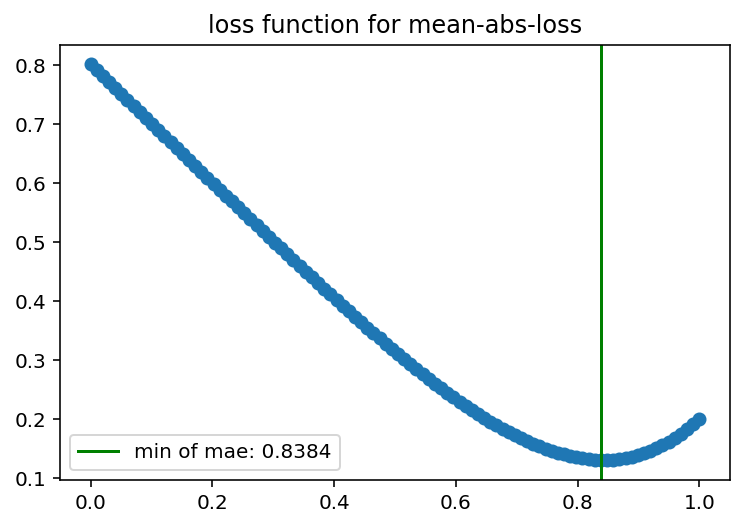

In [36]:
plt.plot(p_grid, loss, '-o')
plt.title('loss function for mean-abs-loss')
plt.axvline(x=p_grid[indx], label=f'min of mae: {p_grid[indx]:.4}', color='g')
plt.legend();

Notice that the minimum is equal to median.

**median = point of min mean abs loss**

Similarily, MSE error is at the mean point of the samples. See [Wikipedia's section on mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error#:~:text=In%20regression,-Further%20information%3A%20Reduced&text=The%20mean%20of%20the%20distance,is%20closer%20to%20actual%20data.)

min loss:  0.028153892459952708  at p =  0.797979797979798


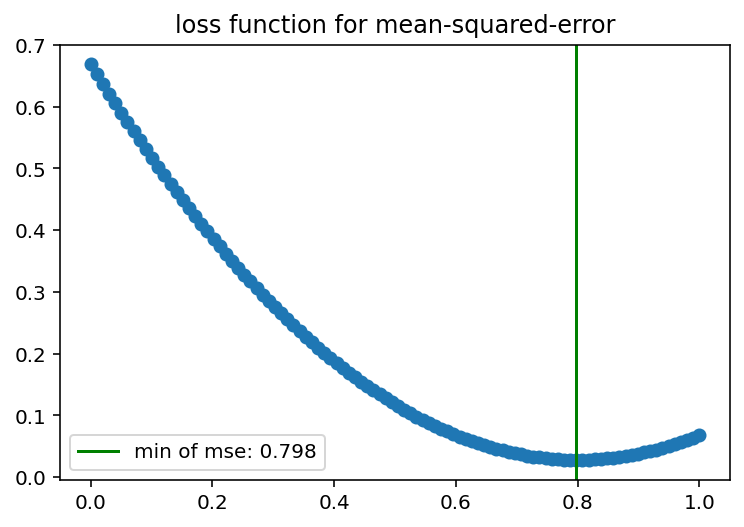

In [37]:
def loss_eval_mse(p_decision, p_grid, samples):
    return sum(np.power(p_decision - samples, 2)) / len(samples)

loss = [loss_eval_mse(p, p_grid, samples) for p in p_grid]
indx = np.argmin(loss)
print('min loss: ', loss[indx], ' at p = ', p_grid[indx])

plt.plot(p_grid, loss, '-o')
plt.title('loss function for mean-squared-error')
plt.axvline(x=p_grid[indx], label=f'min of mse: {p_grid[indx]:.4}', color='g')
plt.legend();

## 3.3. Sampling to simulate prediction

Generating implied observations from a model is useful for at least four reasons.
1. Model design.  
    - We can sample not only from the posterior but from the prior.
    - Seeing what the model expects, before the data arrive, is the best way to understand the implications of the prior.
1. Model checking. 
    - After model is updated using data, it is worth simulating implied observations, to check both whether the fit worked correctly and to investigate model behavior.
1. Software validation.
    - In order to be sure that our model fitting software (numpy, scipy, pymc3, etc) is working, it helps to simulate observations under a known model and then attempt to recover the values of the parameters the data were simulated under.
1. Research design.
    - If you can simulate observations from your hypothesis, then you can evaluate whether the research design is effective.
1. Forecasting.
    - Estimates can be used to simulate new predictions for new cases and future observations; it can also be useful for model criticism and revision.

Code 3.20

Binomial distribution
- Write down the PMF: $Pr(W|N, p) = $

In [38]:
# evaluate PMF at [0, 1, 2], when 
#  N = 2 (total num. of trial)
#  p = .7
pmf2 = stats.binom(n=2, p=0.7).pmf(range(3))
pmf2

array([0.09, 0.42, 0.49])

Q. check whether the sum is 1.

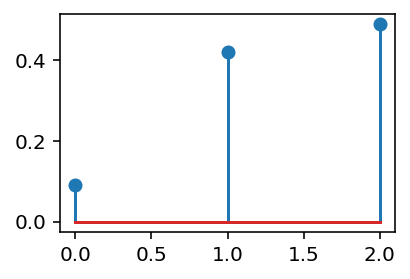

In [39]:
plt.figure(figsize=(3,2))
plt.stem(pmf2);

Appreciate the result. 
- Since $p=0.7$, we will have two 1s more frequently than one 1 (1,0 or 0,1) or two zeros.

Code 3.21
- we can simulate.

In [40]:
# only one sample from the PMF.
stats.binom(n=2, p=.7).rvs()

2

In [41]:
# many samples
samples = stats.binom(n=2, p=.7).rvs(100000)
samples[:10]

array([2, 1, 1, 2, 1, 2, 0, 2, 1, 0])

In [42]:
x, counts = np.unique(samples, return_counts=True)
proportion = counts / len(samples)
x, counts, proportion

(array([0, 1, 2]),
 array([ 8893, 42209, 48898], dtype=int64),
 array([0.08893, 0.42209, 0.48898]))

In [43]:
# compare to the output based on mathematical calculation
stats.binom(n=2, p=0.7).pmf(range(3))

array([0.09, 0.42, 0.49])

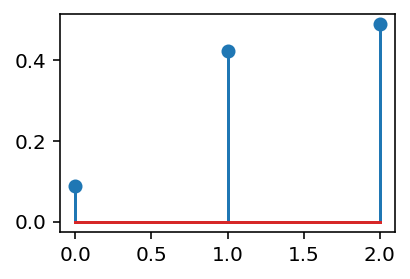

In [44]:
plt.figure(figsize=(3,2))
plt.stem(proportion);

Code 3.24, 3.25

- Let's simulate the case of 9 tosses. This is just a simple computation.

In [45]:
# In the case of p=.7, this is simply binomial random sampling.
samples = stats.binom(n=9, p=.7).rvs(100000)
samples[:10]

array([6, 8, 6, 7, 8, 5, 5, 7, 6, 7])

In [46]:
x, counts = np.unique(samples, return_counts=True)
proportion = counts / len(samples)
x, counts, proportion

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([    3,    41,   437,  2108,  7356, 17115, 26699, 26616, 15571,
         4054], dtype=int64),
 array([3.0000e-05, 4.1000e-04, 4.3700e-03, 2.1080e-02, 7.3560e-02,
        1.7115e-01, 2.6699e-01, 2.6616e-01, 1.5571e-01, 4.0540e-02]))

In [47]:
pmf9 = stats.binom(n=9, p=0.7).pmf(range(10))

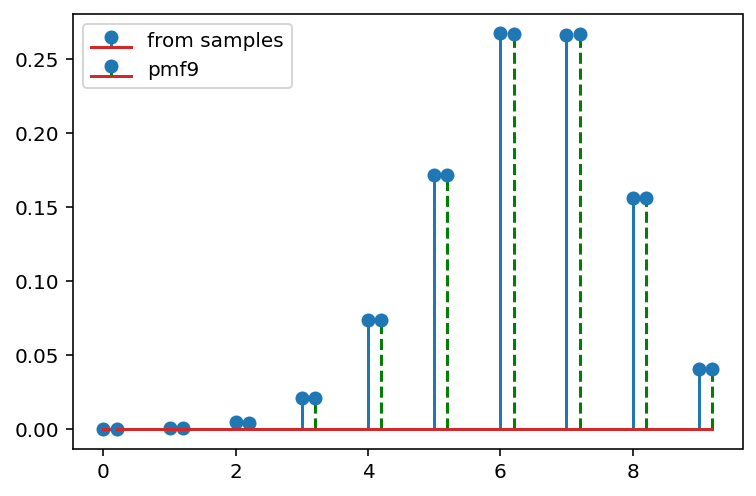

In [48]:
plt.stem(x, proportion, label='from samples')
plt.stem(x+.2, pmf9, linefmt='g--', label='pmf9', )
plt.legend();

So the random sampler seems working good. Well, this is obvious since we are using `stats.binom` for both of the computations.

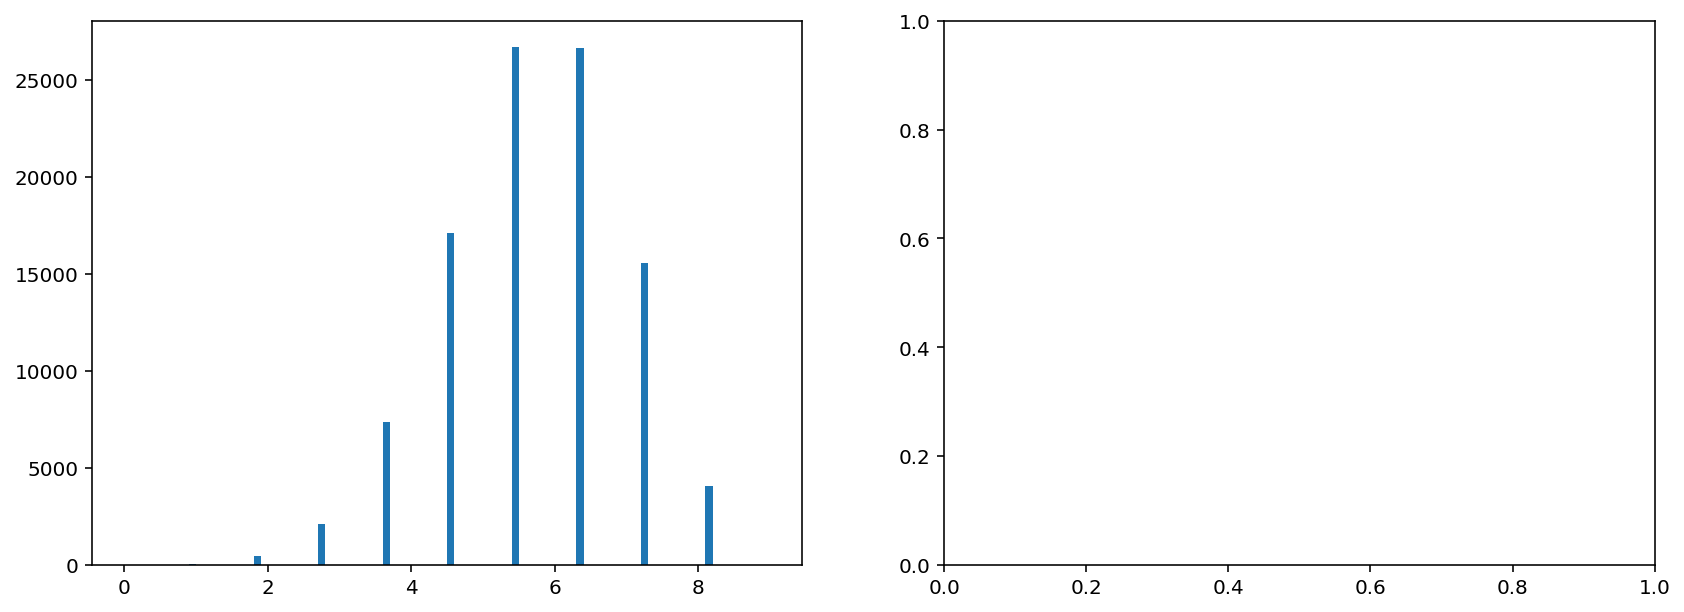

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))
axes[0].hist(samples, bins=10, width=.1);
# axes[1].

Code 3.26
- Now we want to experiment $9$ tosses based on our posterior.
- We don't have its function in `scipy.stats`.
- We don't know its exact mathematical formula.
- We have a lot of samples $\theta^s$ or $p^s$ from the posterior.

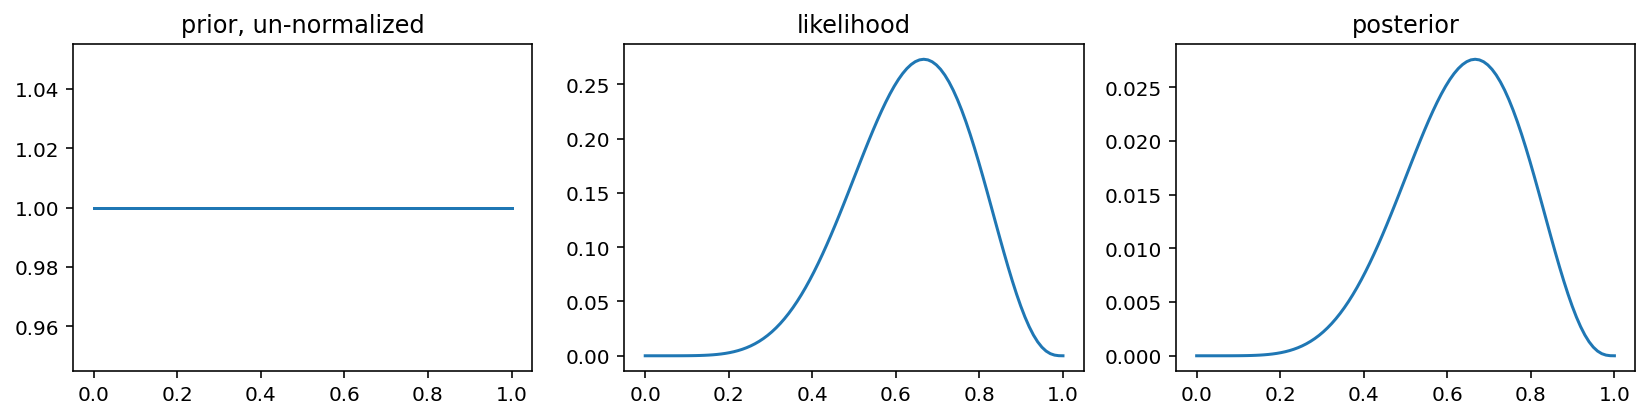

In [50]:
# first compute the grid-based posterior, again, to be sure.
p_grid, posterior = posterior_grid(n_grids=100, n_success=6, n_tosses=9, prior='uniform')

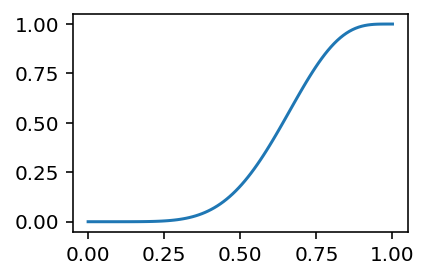

In [51]:
posterior_cum = np.cumsum(posterior)
plt.figure(figsize=(3,2))
plt.plot(p_grid, posterior_cum)

In [52]:
# use np.random.choice()
# 1. generate p samples
p_samples = np.random.choice(p_grid, replace=True, p=posterior, size=100000)
# 2. based on each p, generate 1 y sample
y_samples = stats.binom(p=p_samples, n=9).rvs(100000)
y_samples[:10]

array([8, 7, 9, 5, 5, 3, 8, 7, 9, 6])

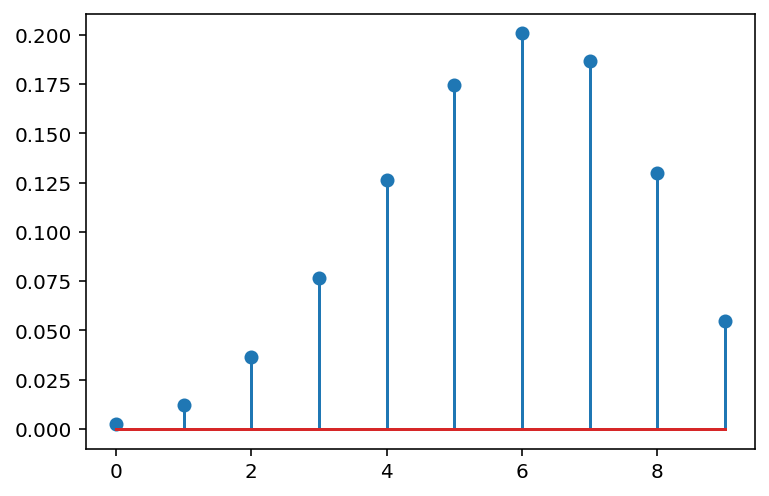

In [53]:
# 3. evaluate posterior y samples
ys, y_counts = np.unique(y_samples, return_counts=True)
prop = y_counts.astype(float) / y_counts.sum()
plt.stem(ys, prop);

**!!! do not try, extremely slow !!!**

In [54]:
# in a more simple code, but extremely slow in python; python is not supoosed to enjoy this kind of loop.
y_samples_slow = []
for p in p_samples:
    y_samples_slow.append(stats.binom(p=p, n=9).rvs(1))

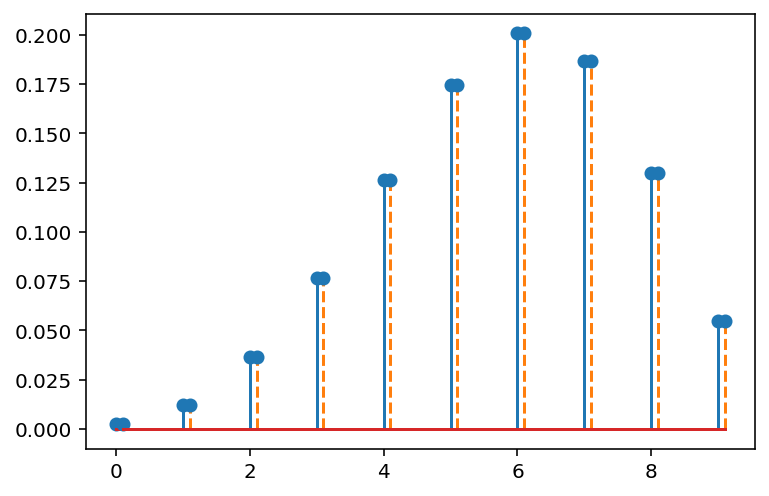

In [55]:
ys_slow, y_counts_slow = np.unique(y_samples, return_counts=True)
prop_slow = y_counts_slow.astype(float) / sum(y_counts_slow)
plt.stem(ys_slow, prop_slow)
plt.stem(ys + .1, prop, 'C1--');

---

## 3.5. Practice

Code 3.27

Use the values in `samples` to answer the questions 3E1 ~ 3E7.

In [57]:
n_grids = 1000
p_grid = np.linspace(0, 1, n_grids)
prior = np.repeat(1, n_grids)
likelihood = stats.binom(p=p_grid, n=9).pmf(k=6)
posterior = likelihood * prior
posterior /= sum(posterior)

In [58]:
# 3E1 How much posterior probability lies below p=0.2?

**3M1 ~ 3M6**

- Now the data is 8 W in 15 tosses.
1. Construct the posterior distribution with flat prior.
1. Draw 10000 samples from the grid approximation, and calculate 90% HPDI for p.
1. Do a posterior predictive check for the model and data. This means simulate the distribution of samples, averaging over the posterior uncertainty in p. What is the probability (data likelihood) of observing 8 water in 15 tosses?
4. Using the posterior distribution, calculate the probability of observing 6 water in 9 tosses.

$$
    Pr[6|9] = \sum_{i=0}^{N_p}Pr[6| n=9, p=p_i] \times Pr[p=p_i | 8/15]
$$

5. Repeat 1~4 with the half constant prior.
6. **!!** How many experiments until the 99% percentile interval is only 0.05 wide?

**Hard**

- Two child birth record: mail=1, femail = 0

In [60]:
birth1 = [  # first chile
    1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
    0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
    1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
    0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
]
birth2 = [  # second child
    0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
    0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
    0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
]

End.